In [1]:
import joblib
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
model=joblib.load('Brain_tumour_KNean_model.sav')

tumorLabel=4

In [2]:
test_img_path='test_images'
test_img_names=os.listdir(test_img_path)

for test_img_name in test_img_names:
    img_path=os.path.join(test_img_path,test_img_name)
    img=cv2.imread(img_path,0)
    height,width=img.shape
    imgFlatten=img.reshape(height*width,1)
    labels=model.predict(imgFlatten)
    labels2D=labels.reshape(height,width)
    mask=(labels2D==tumorLabel)

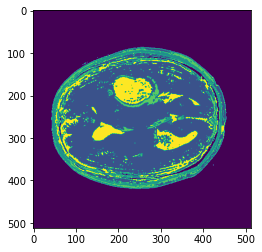

In [3]:
img=cv2.imread('test_images/0 (239).jpg',0)
img_o=cv2.imread('test_images/0 (239).jpg')
height,width=img.shape
imgFlatten=img.reshape(height*width,1)
labels=model.predict(imgFlatten)
labels2D=labels.reshape(height,width)
mask=(labels2D==tumorLabel)
plt.imshow(labels2D)

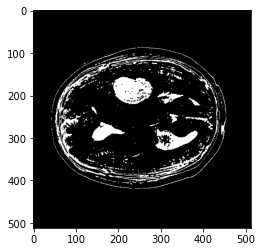

In [4]:
plt.imshow(mask,cmap='gray')

In [5]:
tumorExtracted=np.bitwise_and(mask,img)

In [13]:
contours,hiearachy=cv2.findContours(tumorExtracted,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
print(f'NO. ofcontours ',len(contours))

for index,cnt in enumerate(contours):
    area=cv2.contourArea(cnt)
    
    if area>1000:
        cv2.drawContours(img_o,cnt,-1,(0,255,255),2)
        x,y,w,h=cv2.boundingRect(cnt)
        cv2.rectangle(img_o,(x,y),(x+w,y+h),(0,255,0),2)
        cv2.rectangle(img_o,(x,y),(x+120,y-49),(0,255,0),-1)
        cv2.putText(img_o,'TUMOR',(x+10,y-10),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2)


cv2.imshow('LIVE',img_o)
cv2.waitKey(0)
cv2.destroyAllWindows()
#723

NO. ofcontours  2090
